In [1]:
# %load ../init.ipy
%reload_ext autoreload
%autoreload 2
from importlib import reload

import numpy as np
import holodeck as holo
import holodeck.single_sources as ss
import holodeck.cyutils as cy
import matplotlib.pyplot as plt
import kalepy as kale


import matplotlib.cm as cm
from holodeck import plot, utils
from holodeck.constants import YR, MSOL, GYR

# Check flag replacement
## Fixed_Time

In [2]:
dur, cad = 17.5*YR, 0.2*YR
fobs = utils.nyquist_freqs(dur,cad)
fobs_edges = utils.nyquist_freqs_edges(dur,cad)
sam = holo.sam.Semi_Analytic_Model()
# sam = holo.sam.Semi_Analytic_Model(mtot=(1.0e4*MSOL, 1.0e11*MSOL, 20), mrat=(1e-3, 1.0, 20), redz=(1e-3, 10.0, 20))  # faster version
# hard = holo.hardening.Fixed_Time.from_sam(sam, 3*GYR)
# fobs_orb_edges = fobs_edges / 2.0 
# fobs_orb_cents = fobs/ 2.0
# edges, dnum = sam.dynamic_binary_number(hard, fobs_orb=fobs_orb_cents) #, zero_stalled=True) # should the zero stalled option be part of the parameter space?
# edges[-1] = fobs_orb_edges


GWB 1: 
Current memory usage: max=0.22 GB, RSS=0.22 GB, VMS=391.03 GB
13:12:53 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
13:12:53 INFO : Stalled SAM bins based on GMT: 1.98e+05/4.99e+05 = 3.96e-01 [sam.py:static_binary_density]
13:12:53 INFO : Adding MMbulge scatter (3.4000e-01) [sam.py:static_binary_density]
13:12:53 INFO : 	dens bef: (1.28e-114, 5.22e-53, 2.59e-13, 2.12e-03, 1.66e-02, 2.92e-02, 4.47e-02) [sam.py:static_binary_density]
13:13:00 INFO : Scatter added after 6.668867 sec [sam.py:static_binary_density]
13:13:00 INFO : 	dens aft: (6.14e-17, 7.92e-09, 2.90e-06, 2.19e-03, 1.69e-02, 2.92e-02, 4.27e-02) [sam.py:static_binary_density]
13:13:00 INFO : 	mass: 8.56e-02 ==> 8.54e-02 || change = -1.8507e-03 [sam.py:static_binary_density]
13:13:00 INFO : zeroing out 1.98e+05/4.99e+05 = 3.96e-01 systems stalled from GMT [sam.py:static_binary_density]
13:13:00 INFO : fraction of coalesced binaries: 7.15e+05/2.15e+07 = 3.33e-02 [sam.py:dynamic_binary_n

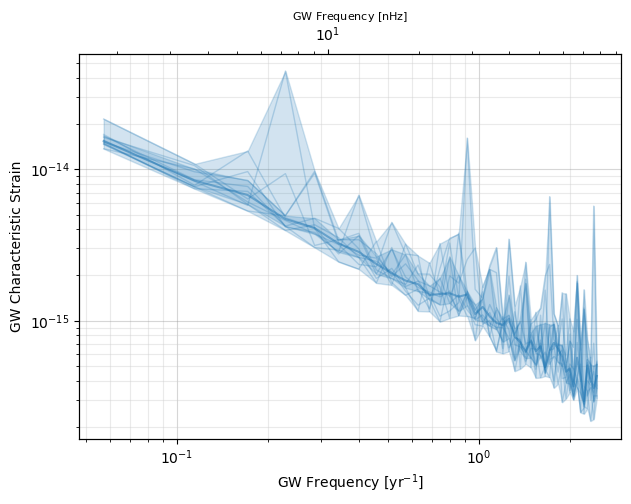

In [3]:
# just using gwb() function
gwb = sam.gwb(fobs_edges, realize=10)
fig = plot.plot_gwb(fobs, gwb)

GWB 1: 
Current memory usage: max=2.34 GB, RSS=1.11 GB, VMS=391.84 GB
13:13:12 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
13:13:12 INFO : fraction of coalesced binaries: 7.15e+05/2.15e+07 = 3.33e-02 [sam.py:dynamic_binary_number]
13:13:12 INFO : stalled binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
GWB 2: 
Current memory usage: max=2.34 GB, RSS=1.12 GB, VMS=391.84 GB
GWB 3: 
Current memory usage: max=2.34 GB, RSS=1.27 GB, VMS=392.00 GB
13:13:16 WARNING : Using `redz_prime` for redshift (includes galaxy merger time, but not evolution time) [sam.py:gwb]
GWB 4: 
Current memory usage: max=2.34 GB, RSS=0.90 GB, VMS=392.16 GB


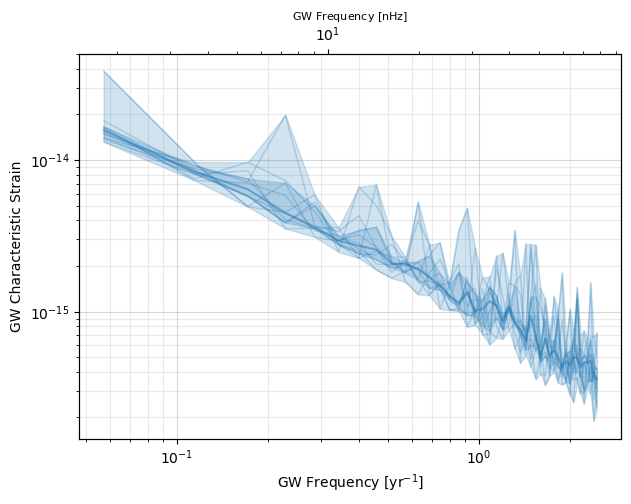

In [4]:
# just using gwb() function

gwb = sam.gwb(fobs_edges, hard=holo.hardening.Hard_GW, realize=10)
fig = plot.plot_gwb(fobs, gwb)

Fixed_Time dadt issue: Need to create a Fixed_Time instance, like by hard = holo.hardening.Fixed_Time.from_sam(sam, 3*GYR)

# ss_gws_redz using sam.ss_gwb()
## with Hard_GW

In [5]:
hc_ss, hc_bg, sspar, bgpar = sam.ss_gwb(fobs_edges, hard=holo.hardening.Hard_GW, realize = 10, loudest = 5, params = True)

SS 1: 
Current memory usage: max=2.34 GB, RSS=0.60 GB, VMS=391.85 GB
13:13:24 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
13:13:25 INFO : fraction of coalesced binaries: 7.15e+05/2.15e+07 = 3.33e-02 [sam.py:dynamic_binary_number]
13:13:25 INFO : stalled binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
SS 2: 
Current memory usage: max=2.34 GB, RSS=0.62 GB, VMS=391.85 GB
SS 3: 
Current memory usage: max=2.34 GB, RSS=0.77 GB, VMS=392.00 GB
13:13:28 WARNING : Using `redz_prime` for redshift (includes galaxy merger time, but not evolution time) [sam.py:ss_gwb]
SS 4: 
Current memory usage: max=2.34 GB, RSS=1.21 GB, VMS=392.16 GB


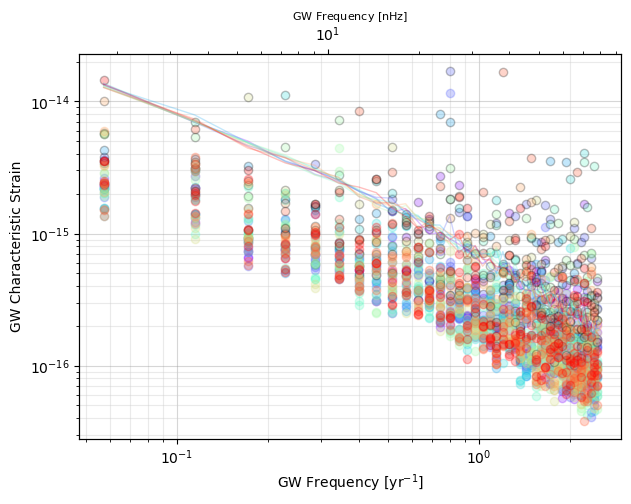

In [6]:
fig = plot.plot_bg_ss(fobs, hc_bg, hc_ss)

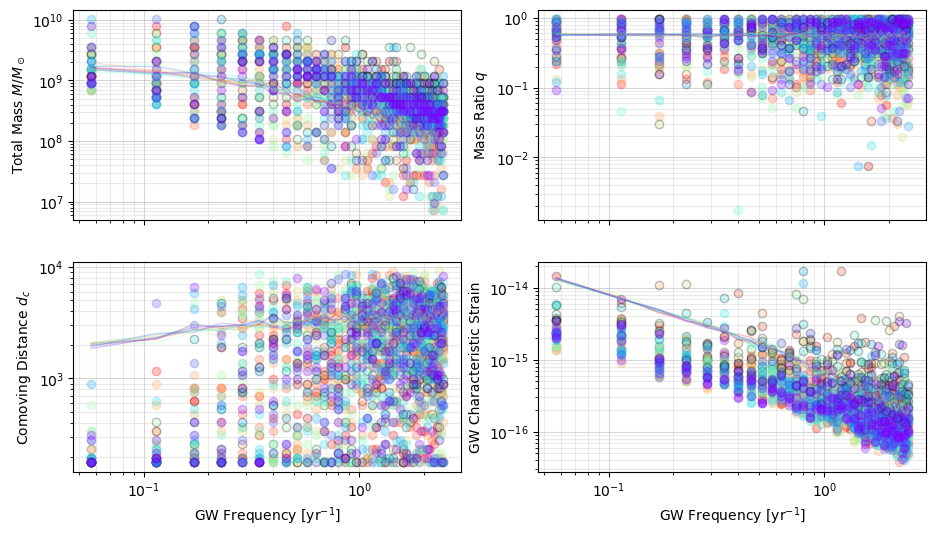

In [7]:
fig = plot.plot_pars(fobs, hc_ss, hc_bg, sspar, bgpar)

SS 1: 
Current memory usage: max=2.34 GB, RSS=0.93 GB, VMS=391.86 GB
13:13:40 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
13:13:40 INFO : fraction of coalesced binaries: 7.15e+05/2.15e+07 = 3.33e-02 [sam.py:dynamic_binary_number]
13:13:40 INFO : stalled binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
SS 2: 
Current memory usage: max=2.34 GB, RSS=0.89 GB, VMS=391.86 GB
SS 3: 
Current memory usage: max=2.34 GB, RSS=1.05 GB, VMS=392.01 GB
13:13:44 WARNING : Using `redz_prime` for redshift (includes galaxy merger time, but not evolution time) [sam.py:ss_gwb]
SS 4: 
Current memory usage: max=2.34 GB, RSS=1.02 GB, VMS=392.17 GB


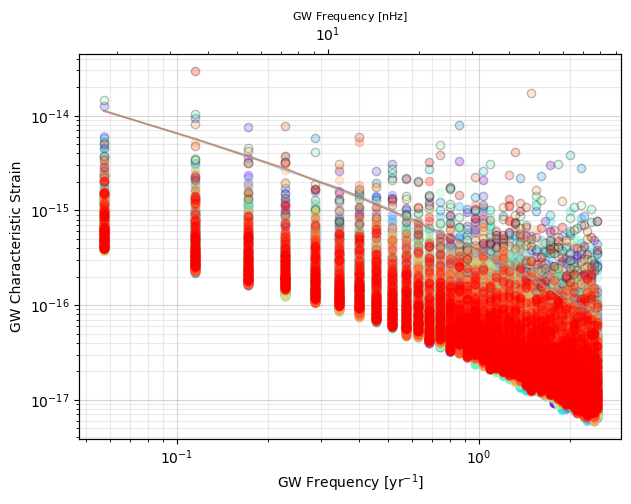

In [8]:
hc_ss, hc_bg = sam.ss_gwb(fobs_edges, realize=30, loudest=100, params=False)
fig = plot.plot_bg_ss(fobs, hc_bg, hc_ss)

## With Fixed_Time

13:14:12 INFO : calculating normalization exactly [hardening.py:__init__]
SS 1: 
Current memory usage: max=2.34 GB, RSS=0.80 GB, VMS=392.37 GB
13:15:26 INFO : zero_coalesced=False, zero_stalled=True [sam.py:dynamic_binary_number]
13:15:28 WARNING : WARNING: _coalesced_ binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
13:15:37 INFO : fraction of stalled binary-xvals: 1.30e+07/2.15e+07 = 6.05e-01 [sam.py:dynamic_binary_number]
13:15:37 INFO : fraction of binaries stalled at all xvals: 3.18e+05/4.99e+05 = 6.38e-01 [sam.py:dynamic_binary_number]
SS 2: 
Current memory usage: max=3.85 GB, RSS=0.58 GB, VMS=392.53 GB
SS 3: 
Current memory usage: max=3.85 GB, RSS=0.73 GB, VMS=392.69 GB
SS 4: 
Current memory usage: max=3.85 GB, RSS=0.99 GB, VMS=392.69 GB


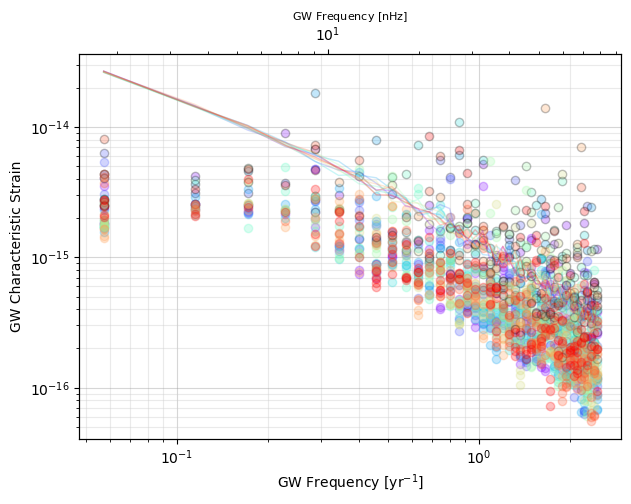

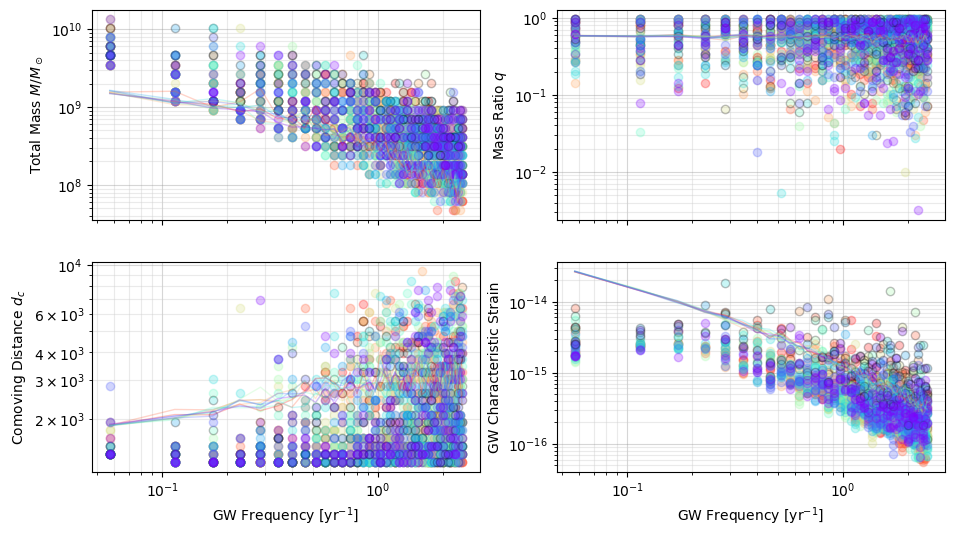

In [9]:
hard = holo.hardening.Fixed_Time.from_sam(sam, 3*GYR)
hc_ss, hc_bg, sspar, bgpar = sam.ss_gwb(fobs_edges, hard=hard, realize = 10, loudest = 5, params = True)
fig = plot.plot_bg_ss(fobs, hc_bg, hc_ss)
fig = plot.plot_pars(fobs, hc_ss, hc_bg, sspar, bgpar )

SS 1: 
Current memory usage: max=4.13 GB, RSS=0.92 GB, VMS=392.55 GB
13:18:16 INFO : zero_coalesced=False, zero_stalled=True [sam.py:dynamic_binary_number]
13:18:17 WARNING : WARNING: _coalesced_ binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
13:18:26 INFO : fraction of stalled binary-xvals: 1.30e+07/2.15e+07 = 6.05e-01 [sam.py:dynamic_binary_number]
13:18:26 INFO : fraction of binaries stalled at all xvals: 3.18e+05/4.99e+05 = 6.38e-01 [sam.py:dynamic_binary_number]
SS 2: 
Current memory usage: max=4.13 GB, RSS=0.57 GB, VMS=392.55 GB
SS 3: 
Current memory usage: max=4.13 GB, RSS=0.73 GB, VMS=392.70 GB
SS 4: 
Current memory usage: max=4.13 GB, RSS=0.99 GB, VMS=392.70 GB


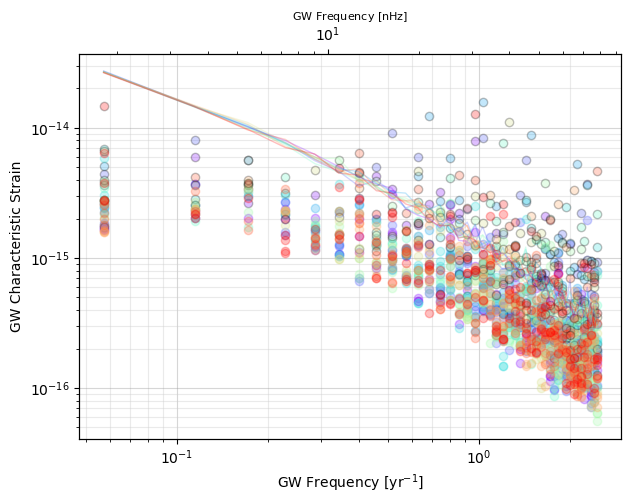

In [11]:
hc_ss, hc_bg = sam.ss_gwb(fobs_edges, hard=hard, realize = 10, loudest = 5, params = False)
fig = plot.plot_bg_ss(fobs, hc_bg, hc_ss)